# Exercise 02 Regression I - Simple Linear Regression

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

## Part 1. Simple linear regression with ordinary least squares approach

This part will build a simple linear regression model with a toy dataset. The parameters (slope and y-intercept) will be estimated using the ordinary least squares approach. In this part, we will implement the ordinary least squares with only Python build-in math module, as well as the Pandas and NumPy library.

### Import libraries

In [2]:
# import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In this exercise, we will use a small standard dataset: the [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Please download this dataset (.csv file) from Learn and load it use Pandas.

The diabetes dataset contains the diabetes data collected from 442 patients. There are ten features (the first 10 columns) in the dataset:
- age (age in years)
- sex
- bmi (body mass index)
- bp (average blood pressure)
- s1 (tc, total serum cholesterol)
- s2 (ldl, low-density lipoproteins)
- s3 (hdl, high-density lipoproteins)
- s4 (tch, total cholesterol / HDL)
- s5 (ltg, possibly log of serum triglycerides level)
- s6 (glu, blood sugar level)

The 11st column is the target variable, a quantitative measure of disease progression one year after baseline.

In [3]:
# load diabetes dataset
data_df = pd.read_csv('Diabetes Dataset.csv')
data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


### Explore the dataset

In this exercise, we want to build a simple linear regression model to predict the target variable (the quantitative measure of disease progression one year after baseline) for diabetes patients.

As we are using the simple linear regression as the regression algorithm, we need to select a single input variable from the 10 features. We can compare the correlations between different features and the target variable and select the feature with the strongest correlation as the input variable.

In [4]:
# calculate the correlation matrix for all columns in the dataset
corr = data_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


The last row of the correlation matrix shows the correlations between different features and the target variable. We can find that the third feature, bmi, has the strongest correlation.

We can also set different background colors for the cells according to the strength of the correlation to make it more intuitive.

In [5]:
# Show correlation matrix with background colors
# Need to install jinja2
corr.style.background_gradient(cmap = 'coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


By comparint the correlations between different features and the target variable, we can select bmi as the input variable for our simple linear regression model.

### Split training and test dataset

We need to split the dataset into two parts: the training and test dataset. The training dataset will be used to train the simple linear regression model. The test dataset will be used to evaluate the learned model.

The proportions of training and test sets can vary. Here we use 50% of the data as the training set and the rest data as the test set.

In [6]:
# get the total amount of the data
print("The dataset contains a total of {} instances of data.".format(len(data_df)))

The dataset contains a total of 442 instances of data.


In [7]:
# split the training and test set
train_ratio = 0.5
train_df = data_df[:int(train_ratio * len(data_df))]
test_df = data_df[int(train_ratio * len(data_df)):]

print("The training dataset contains a total of {} instances of data.".format(len(train_df)))
print("The testing dataset contains a total of {} instances of data.".format(len(test_df)))

The training dataset contains a total of 221 instances of data.
The testing dataset contains a total of 221 instances of data.


In [8]:
# extract the input and target variables
X_train, y_train = train_df['bmi'].values, train_df['target'].values
X_test, y_test = test_df['bmi'].values, test_df['target'].values

print(X_train)

[32.1 21.6 30.5 25.3 23.  22.6 22.  26.2 32.1 30.  18.6 28.  23.7 26.2
 24.  24.7 30.3 27.5 25.4 24.7 21.1 24.3 26.  32.  29.7 25.2 19.2 31.9
 24.4 25.8 30.5 20.3 38.  21.7 20.5 23.5 28.5 27.4 33.  27.7 25.6 20.1
 25.4 24.2 32.7 23.1 25.3 19.6 22.5 27.7 25.7 27.9 25.5 24.9 28.7 21.8
 30.2 20.5 20.4 24.  26.  26.8 25.7 22.9 24.  24.1 24.7 25.  23.6 22.1
 19.9 29.5 26.  24.5 26.6 23.5 29.  23.  21.  22.9 27.5 24.3 23.1 27.3
 22.7 33.  19.4 25.8 22.6 21.9 24.  31.2 26.8 20.4 24.8 21.  27.3 34.6
 25.9 20.4 28.  22.2 29.  30.2 32.4 23.4 19.3 31.  30.6 25.5 23.4 26.8
 28.3 27.7 36.6 26.5 31.8 24.4 25.4 22.  26.8 28.  33.9 29.6 28.6 25.6
 20.7 26.2 20.6 27.9 35.3 19.9 24.4 21.4 30.4 31.6 18.8 31.  36.7 32.1
 27.7 30.8 27.5 26.9 30.7 38.3 31.9 35.  27.8 25.9 32.9 26.  26.3 22.3
 28.3 32.  25.4 23.3 20.3 30.4 20.6 32.3 29.2 33.1 24.6 20.2 20.8 32.8
 31.9 23.9 24.5 22.1 33.  19.  27.3 22.8 28.2 28.9 25.6 24.9 26.8 22.4
 26.9 23.1 28.6 24.7 30.3 21.3 26.1 20.2 25.2 22.5 23.5 25.9 20.9 28.7
 22.1 

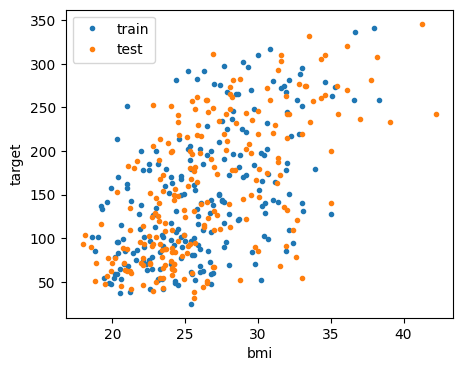

In [9]:
# visualize the training and test set
plt.figure(figsize = [5, 4])
plt.plot(X_train, y_train, '.', label = 'train')
plt.plot(X_test, y_test, '.', label = 'test')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

### Ordinary least squares approach

We will use the ordinary least squares approach to estimate the slope and y-intercept parameter for the simple linear regression model.

$\hat{\beta}_1=\frac{S_{xy}}{S_{xx}}$

$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$

$\bar{x}=\frac{1}{n}\sum_{i=1}^nx_i$

$\bar{y}=\frac{1}{n}\sum_{i=1}^ny_i$

$S_{xx}=\frac{1}{n-1}\sum(x_i-\bar{x})^2$

$S_{xy}=\frac{1}{n-1}\sum(x_i-\bar{x})(y_i-\bar{y})$

In [10]:
# calculate the average of x and y
X_mean = X_train.mean()
y_mean = y_train.mean()

In [11]:
# calculate Sxy and Sxx
S_xx = np.square((X_train - X_mean)).sum() / (len(X_train) - 1)
S_xy = ((X_train - X_mean) * (y_train - y_mean)).sum() / (len(X_train) - 1)

In [12]:
# calculate the slope and y-intercept
slope = S_xy / S_xx
y_intercept = y_mean - slope * X_mean
print('The value of the slope is:', slope)
print('The value of the y-intercept is:', y_intercept)

The value of the slope is: 9.856096036094776
The value of the y-intercept is: -109.91157469331546


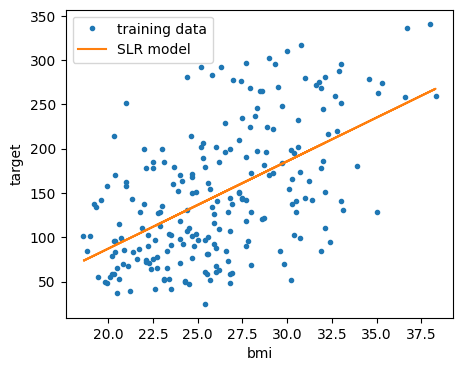

In [13]:
# visulalize the learned model
plt.figure(figsize = [5, 4])
plt.plot(X_train, y_train, '.', label = 'training data')
plt.plot(X_train, y_intercept + slope * X_train, '-', label = 'SLR model')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

### Evaluate the model with test set

Once we obtained the slope and y-intercept of the simple linear regression model using the training dataset, we can evaluate the learned model using the test dataset.

In [14]:
# use the learned model to make predictions on the test set
y_pred = y_intercept + slope * X_test

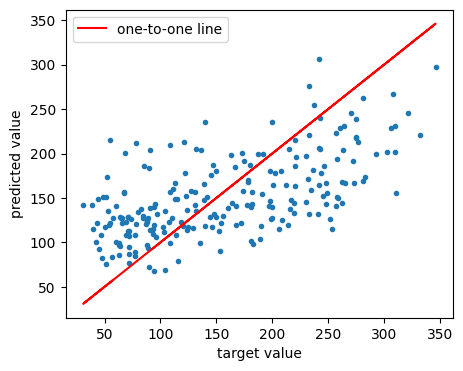

In [15]:
# visualize the predictions
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.')
plt.plot(y_test, y_test, 'r-', label = 'one-to-one line')
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.legend()
plt.show()

As can be seen from the figure above, the scattered points are distributed near the one-to-one line. This indicates that the simple linear regression model can somehow predict the progression of diabetes by a patient's BMI.

Apart from the visualization, we can use different metrics to evaluate the model quantitatively. Here we will calculate the MSE (mean squared error), RMSE (root mean squared error) and $R^2$ (the coefficient of determination) to evaluate the regression model. 

In [16]:
# calculate mse
mse_test = np.square(y_test - y_pred).mean()
print("The MSE on the test dataset is:", mse_test)

The MSE on the test dataset is: 3878.729958668522


In [17]:
# calculate rmse
rmse_test = math.sqrt(mse_test)
print("The RMSE on the test dataset is:", rmse_test)

The RMSE on the test dataset is: 62.27945053280835


In [18]:
# calculate r^2
r2_test = 1 - np.square(y_test - y_pred).sum() / np.square(y_test - y_test.mean()).sum()
print("The R2 score on the test dataset is:", r2_test)

The R2 score on the test dataset is: 0.37410885207201106


## Part 2. Simple linear regression with `scikit-learn`

In this part, we will rebuild the above simple linear regression model using `scikit-learn`. More specifically, we will use `sklearn.linear_model.LinearRegression()` to fit a simple linear regression model on the same diabetes dataset.

`sklearn.linear_model.LinearRegression()` also use the ordinary least squares approach to estimate the slope and y-intercept. However, instead of using hand-coded programs, `scikit-learn` offers a lot of API to implement the machine learning process quickly and easily.

### Import libraries

In [19]:
# import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

### Load dataset

Use `sklearn.datasets.load_diabetes` to load the same diabetes dataset.

In [20]:
# load diabetes dataset
feature_df, target_df = datasets.load_diabetes(return_X_y = True, as_frame = True, scaled = False)

In [21]:
# show the head of the feature_df
feature_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [22]:
# show the head of the target_df
target_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) of `sklearn.datasets.load_diabetes()`. Explain the meaning of the parameters: `return_X_y`, `as_frame`, `scaled`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

`return_X_y` -> Return the data or features as pandas a dataset and the target as a Pandas Series.

`as_frame` -> Decide to return the data as a Series or DataFrame.

`scaled` -> If true, the feature variables are scaled by the standard deviation times the square root of n_samples

### Split training and test dataset

`scikit-learn` offers the `sklearn.model_selection.train_test_split()` function to split the dataset into the training and test part.

In [23]:
# eliminate features other than bmi
feature_df = feature_df['bmi']

In [24]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(feature_df.values, target_df.values, train_size = 0.5, shuffle = False)

<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) of `sklearn.model_selection.train_test_split()`. Explain the meaning of the parameters: `train_size`, `shuffle`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

`train_size` -> Represent the proportion of the dataset to include in the train split.

`shuffle` -> Decide if the data selected in the train and test DF are shuffled or stratified.


### Fit the model

Use `sklearn.linear_model.LinearRegression` to fit the simple linear regression model on the training dataset.

In [25]:
# fit the model
slr = LinearRegression(fit_intercept = True)
slr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [26]:
# print the learned slope and y_intercept
print('The value of the slope is:', slr.coef_[0])
print('The value of the y-intercept is:', slr.intercept_)

The value of the slope is: 9.856096036094781
The value of the y-intercept is: -109.91157469331557


Did you get the same model as in Part 1?

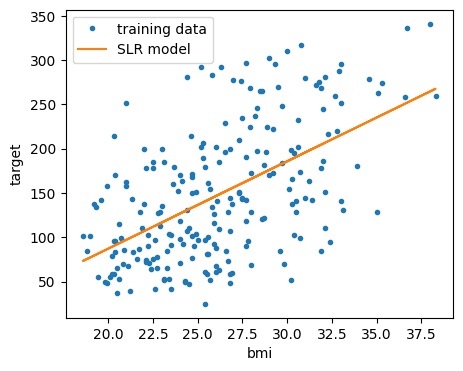

In [27]:
# visulalize the learned model
plt.figure(figsize = [5, 4])
plt.plot(X_train, y_train, '.', label = 'training data')
plt.plot(X_train, slr.intercept_ + slr.coef_[0] * X_train, '-', label = 'SLR model')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) of `sklearn.linear_model.LinearRegression()`. Explain the meaning of the parameters `fit_intercept`, the method `fit()`, and the attributes `coef_` and `intercept_`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

`fit_intercept` -> Whether to calculate the intercept for this model.

`fit()` ->  Fit linear model.

`coef_` -> Estimated coefficients for the linear regression problem.

`intercept_` -> Value of the interception founded.

### Evaluate the model with test set

Similarly, the SLR model built with `scikit-learn` offers the `predict()` method to make predictions on new data. `scikit-learn` also provides a series of build-in [regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) for evaluation purpose.

In [28]:
# use the learned model to make predictions on the test set
y_pred = slr.predict(X_test.reshape(-1, 1))

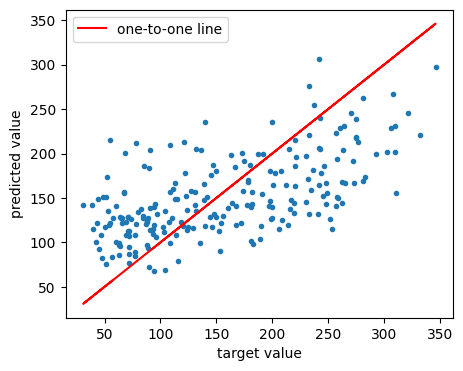

In [29]:
# visualize the predictions
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.')
plt.plot(y_test, y_test, 'r-', label = 'one-to-one line')
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.legend()
plt.show()

In [30]:
# calculate mse
mse_test = mean_squared_error(y_test, y_pred)
print("The MSE on the test dataset is:", mse_test)

The MSE on the test dataset is: 3878.7299586685217


In [31]:
# calculate rmse
rmse_test = root_mean_squared_error(y_test, y_pred)
print("The RMSE on the test dataset is:", rmse_test)

The RMSE on the test dataset is: 62.27945053280835


In [32]:
# claculate r^2
r2_test = r2_score(y_test, y_pred)
print("The R2 score on the test dataset is:", r2_test)

The R2 score on the test dataset is: 0.37410885207201117


<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) of `sklearn.linear_model.LinearRegression()`. Explain the meaning of the method `predict()`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

`predict()` 

-> Predict using the linear model. 
Parameters:
X = array-like or sparse matrix, shape (n_samples, n_features)

Returns:
C = array, shape (n_samples,) Returns predicted values.

## Part 3. Hands-on exercise with a real-world dataset

In this exercise, we will build a regression model with the simple least regression algorithm for a real-world dataset, the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Load the California Housing Dataset
- Explore the dataset
- Pre-process the dataset
- Build the simple linear regression model
- Evaluate the learned SLR model

### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [33]:
# [TBC] complete your code here with proper comments

## Manually

# Path to your data file
file_path = "./housing.csv"

# Load the data into a DataFrame
data_df = pd.read_csv(file_path)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
data = datasets.fetch_california_housing()

# Convert to a DataFrame
data_df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column (house values)
data_df['MedHouseVal'] = data.target

print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


<span style="color:red">**[TBC]**</span> Please explain why you chose the parameter values for the `sklearn.datasets.fetch_california_housing` function and what they do.

<span style="color:red">**[TBC]**</span> Complete your answer here.

It downloads and access the data directly from the sklearn program.

### Task 2. Explore the dataset

You will explore the dataset to get a better understanding of the dataset. The final goal is to select the single input feature for building the SLR model.

<span style="color:red">**[TBC]**</span> First, create a synthetical data frame called `data_df` with both features and target.

In [35]:
# [TBC] complete your code here with proper comments
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<span style="color:red">**[TBC]**</span> Find out how many rows there are in the dataset.

In [36]:
# [TBC] complete your code here with proper comments
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [37]:
# Determine the unique values in the ocean_proximity column
# data_df['ocean_proximity'].unique() 

- NEAR BAY = 1
- <1H OCEAN = 2
- INLAND = 3
- NEAR OCEAN = 4
- ISLAND = 5

In [38]:
# # Change the ocean_proximity values to integers so it is possible to evaluate it in the analysis.
# # Define the mapping
# ocean_proximity_mapping = {
#     'NEAR BAY': 1,
#     '<1H OCEAN': 2,
#     'INLAND': 3,
#     'NEAR OCEAN': 4,
#     'ISLAND': 5
# }

# # Map the values to integers
# data_df['ocean_proximity'] = data_df['ocean_proximity'].map(ocean_proximity_mapping)

# # Verify the changes
# print(data_df['ocean_proximity'].unique())

<span style="color:red">**[TBC]**</span> Explain what information the number of rows in the dataset represents.

<span style="color:red">**[TBC]**</span> Complete your answer here.

There is 20640 entries, each row represents a census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).


<span style="color:red">**[TBC]**</span> Find out how many columns there are in the dataset and and what is the name of each column.

In [39]:
# [TBC] complete your code here with proper comments
data_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

<span style="color:red">**[TBC]**</span> Explain the meaning of the variables represented by each column.

<span style="color:red">**[TBC]**</span> Complete your answer here.

The columns represent the number of features that are in the data set, where seems that:

    Longitude = block group longitude
    Latitude = block group latitude
    HouseAge = house age in block group
    AveRooms = average number of rooms per household
    AveBedrms = average number of bedrooms per household
    Population = block group population
    AveOccup = average number of household members
    MedInc = median income in block group
    MedHouseVal =  median house value for California districts and the target value.
    # Ocean_proximity = If it is close to the ocean

<span style="color:red">**[TBC]**</span> Explore the statistics for each column.

Tips:
- You can use [`pd.DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) to get descriptive statistics for each column.
- You can also use [`pd.DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist) to plot the hisrograms for each column to visualize its distribution.

In [40]:
# [TBC] complete you code here with comments

# Set float format to display only 2 decimals
pd.options.display.float_format = "{:.2f}".format

# Call the describe function to understand the statistical information of the data set
pd.DataFrame.describe(data_df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [41]:
# mode_ocean_proximity = data_df["ocean_proximity"].mode()[0]
# mode_count = (data_df['ocean_proximity'] == mode_ocean_proximity).sum()
# print(f'The most common value in ocean_proximity is {mode_ocean_proximity} (<1H OCEAN) counted {mode_count} times')

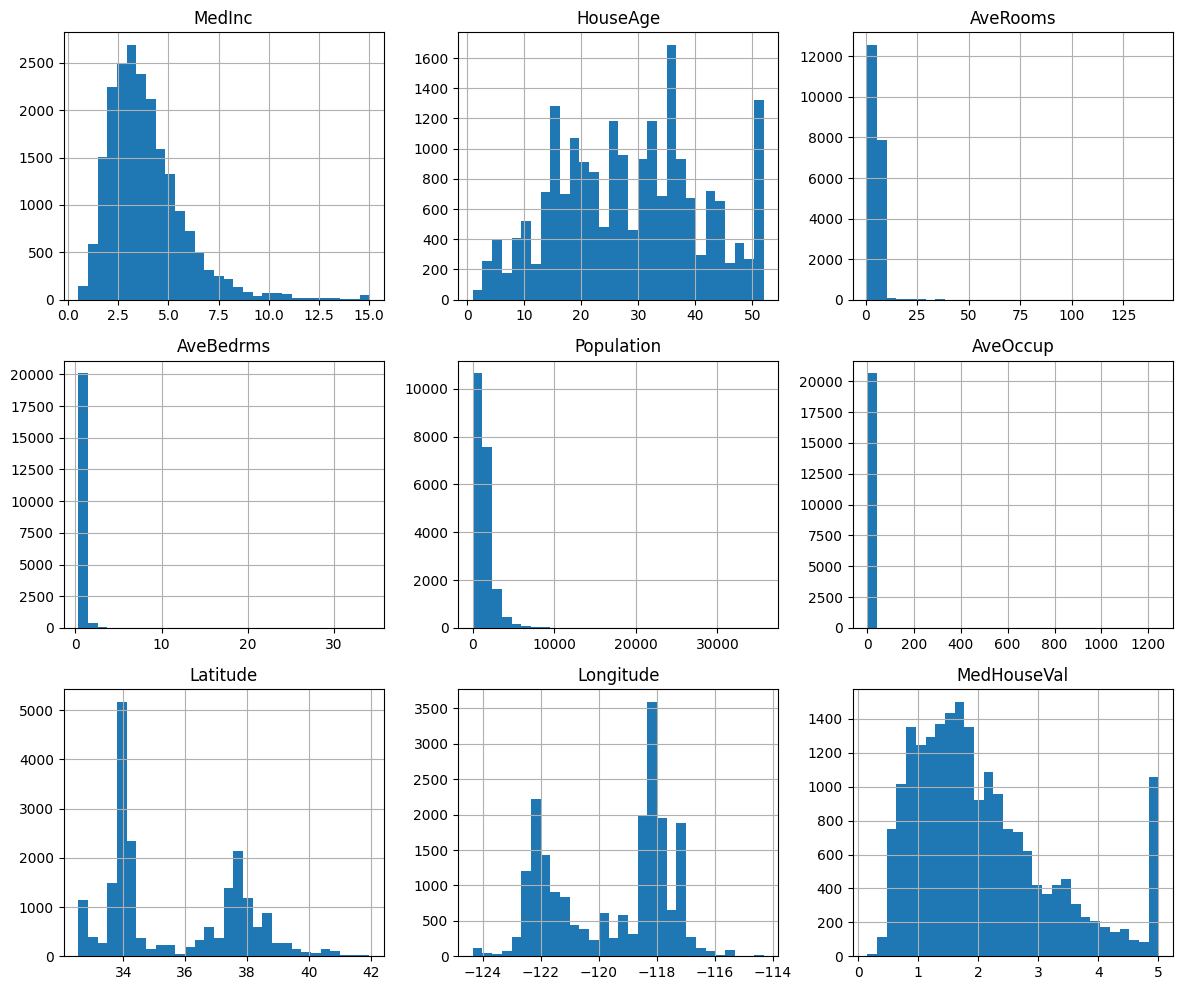

In [42]:
# Shows the histogram for all the numeric values in the data set.
data_df.hist(figsize=(12, 10),bins=30)

# Show the plot
plt.tight_layout() #Ensures the plots do not overlap and are neatly arranged.
plt.show()

<span style="color:red">**[TBC]**</span> Describe your findings from the above descriptive statistics.

<span style="color:red">**[TBC]**</span> Complete your answer here.

- The mean of the houses value in this set is $206.855,82 with a min of $14.999 and a max of $500.001 
- By the graphs of MedHouseVal, we can assume that there is a limit in the max value, issue that affects the performance of the model.
- There is an unexpected performance in the graphs of AveBedrms, AvOccup, AveRooms, Population 
- I believed that the median_income is in thousands, if I am correct the mean would be $3.870
- The block groups show big differences in AvOccup, HouseAge and population by showing std values of 10.39, 12.59, 1132.
- Whereas the features of longitude, latitude and AveBedrms show small deviations


<span style="color:red">**[TBC]**</span> Select a single input variable from the available features. Compare the correlations between different features and the target variable and select the feature with the strongest correlation as the input variable.

<span style="color:red">**[TBC]**</span> Which feature did you select? Write your answer here.

The Feature selected was the <b>median_income</b> as it has a correlation of <b>0.68</b> (The highest one) with the target column.

In [43]:
# [TBC] complete your code here with proper comments
corr = data_df.corr() # Shows the correlation between the different features
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
MedHouseVal,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


In [44]:
# Give visual support to the correlation table.
corr.style.background_gradient(cmap = 'coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### Task 3. Pre-process the dataset

<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and test set. Please use 70% of the data as the training dataset, and the rest as the test dataset.

In [45]:
# [TBC] complete your code here with proper comments
feature_df = data_df['MedInc'] # Here I select the median_income column as the feature that will be used in the model
target_df = data_df['MedHouseVal'] # Selection of the target column.


In [46]:
# This function do the split of the data set, in this case using the 70% on training the model.
X_train, X_test, y_train, y_test = train_test_split(feature_df.values, target_df.values, train_size = 0.7, shuffle = False)

### Task 4. Build the SLR model

<span style="color:red">**[TBC]**</span> Please complete the following steps:

- Fit the model with the training dataset
- Print the value of slope and y-intercept
- Visualize the learned model

In [47]:
# [TBC] complete your code here with proper comments

# Fit the Simple linear regression model
slr = LinearRegression(fit_intercept = True)
slr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [48]:
# print the learned slope and y_intercept
print('The value of the slope is:', round(slr.coef_[0],2))
print('The value of the y-intercept is:', round(slr.intercept_,2))

The value of the slope is: 0.41
The value of the y-intercept is: 0.43


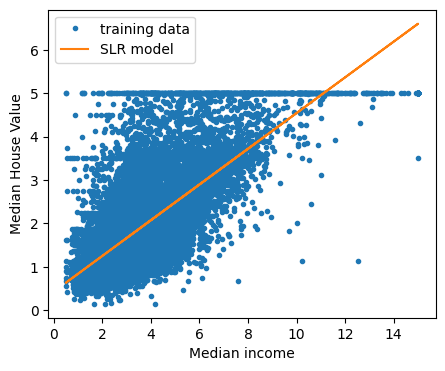

In [49]:
# visulalize the learned model
plt.figure(figsize = [5, 4])
plt.plot(X_train, y_train, '.', label = 'training data')
plt.plot(X_train, slr.intercept_ + slr.coef_[0] * X_train, '-', label = 'SLR model')
plt.xlabel('Median income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

### Task 5. Evaluate the learned SLR model

<span style="color:red">**[TBC]**</span> Please complete the following steps:

- Use the learned model to make predictions on the test dataset
- Visualize the predictions
- Calculate quantitative metrics for evaluation: MSE, RMSE, $R^2$

In [50]:
# [TBC] complete your code here with proper comments

# use the learned model to make predictions on the test set
y_pred = slr.predict(X_test.reshape(-1, 1))

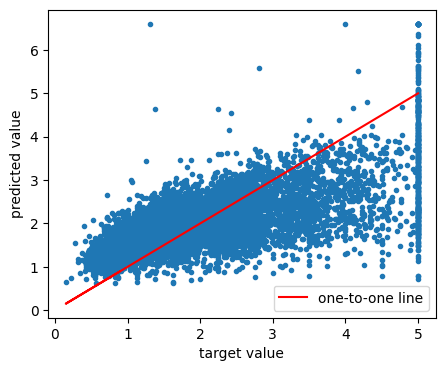

In [51]:
# visualize the predictions
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.')
plt.plot(y_test, y_test, 'r-', label = 'one-to-one line')
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.legend()
plt.show()

In [52]:
# calculate mse
mse_test = mean_squared_error(y_test, y_pred)
print("The MSE on the test dataset is:", mse_test)

The MSE on the test dataset is: 0.8337443083034566


In [53]:
# calculate rmse
rmse_test = root_mean_squared_error(y_test, y_pred)
print("The RMSE on the test dataset is:", rmse_test)

The RMSE on the test dataset is: 0.9130960016906527


In [54]:
# claculate r^2
r2_test = r2_score(y_test, y_pred)
print("The R2 score on the test dataset is:", r2_test)

The R2 score on the test dataset is: 0.4243599136627426


### Challenge 1. Eliminate capped data and rebuild the model

As can be seen from the result figure, the `MedHouseVal` seems to have an upper limit near 5. Check the descriptive statictics using `pd.DataFrame.describe()`, we can find that the maximum value of `MedHouseVal` is 5.00001.

This capping may be caused by different reasons:
- Capping the values can be a way to ensure privacy, as very high values could potentially be used to identify individual properties or owners, especially if combined with other information.
- Sometimes, values are capped during the data entry process to prevent the effects of possible data collection or entry errors.

Although we don't know the specific reason, such capped data does not reflect the true situation of housing prices. 

Try to eliminate thes capped data from the dataset and rebuild the SLR model. Evaluate the new model with different metrics, Can you get a better model? Different metrics may give you different conclusions.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not encouraged. Try to complete the code even if it doesn't meet the requirements.

In [55]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [56]:
# [TBC] complete your code here with proper comments

# Create a new DataFrame excluding rows with MedHouseVal >= 5000000
new_data_df = data_df[data_df['MedHouseVal'] < 5]
new_data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42
...,...,...,...,...,...,...,...,...,...
20635,1.56,25.00,5.05,1.13,845.00,2.56,39.48,-121.09,0.78
20636,2.56,18.00,6.11,1.32,356.00,3.12,39.49,-121.21,0.77
20637,1.70,17.00,5.21,1.12,1007.00,2.33,39.43,-121.22,0.92
20638,1.87,18.00,5.33,1.17,741.00,2.12,39.43,-121.32,0.85


The value of the slope is: 0.39
The value of the y-intercept is: 0.43


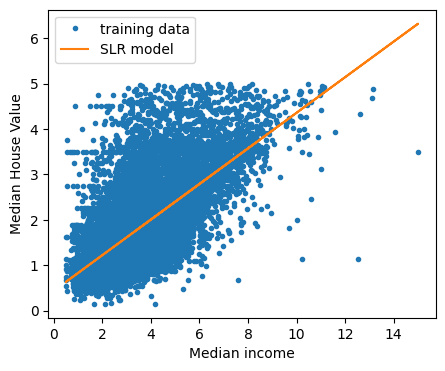

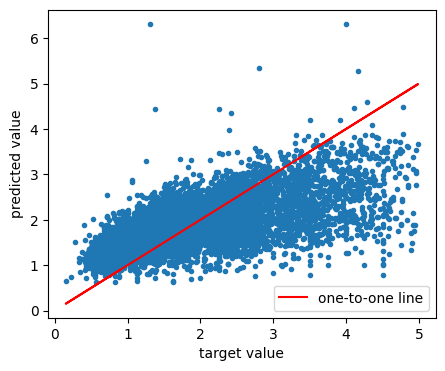

The MSE on the test dataset is: 0.650766941711043
The RMSE on the test dataset is: 0.8067012716681702
The R2 score on the test dataset is: 0.3587688564612026


In [80]:
#Selection of the features and target from the new data frame.
feature_df = new_data_df['MedInc']
target_df = new_data_df['MedHouseVal']

#Do the split of the data frame into the train and test frames.
X_train,X_test,y_train,y_test = train_test_split(feature_df.values,target_df.values,train_size=0.7, shuffle=False)

#Fit the Simple Linear Regression Model
slr = LinearRegression(fit_intercept=True)
slr.fit(X_train.reshape(-1,1),y_train)

#Print the values of the Slope and y_intercept
print('The value of the slope is:', round(slr.coef_[0],2))
print('The value of the y-intercept is:', round(slr.intercept_,2))

#Visualize the train model
plt.figure(figsize=[5,4])
plt.plot(X_train, y_train, '.', label = 'training data')
plt.plot(X_train, slr.intercept_ + slr.coef_[0] * X_train, '-', label = 'SLR model')
plt.xlabel('Median income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

print("The MSE on the test dataset is:", mse_test)
print("The RMSE on the test dataset is:", rmse_test)
print("The R2 score on the test dataset is:", r2_test)

#Use the model to do predictions
y_pred = slr.predict(X_test.reshape(-1, 1))

#Visualize the predictions
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.')
plt.plot(y_test, y_test, 'r-', label = 'one-to-one line')
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.legend()
plt.show()

#Calculate Metrics
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = root_mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("The MSE on the test dataset is:", mse_test)
print("The RMSE on the test dataset is:", rmse_test)
print("The R2 score on the test dataset is:", r2_test)

### Challenge 2. Build two SLR models for the two types of block groups.

As discussed above, for block groups with few households and many empty houses, such as vacation resorts, the values of `AveRooms`, `AveBedrms`, and `AveOccup` can be surprisingly large.

House prices in such block groups may be affected by different factors than those in regular block groups.

Therefore, we want to split the dataset into two parts according to the types of block groups: one part for the block groups with few households and many empty houses, another part for the rest.

We can try to build two SLR models for each to see if we can get better prediction models. To be note, for the block groups with few households and many empty houses, the `MedInc` may not be the best input feature.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not encouraged. Try to complete the code even if it doesn't meet the requirements.

In [67]:
# [TBC] complete your code here with proper comments

# Set the criteria asked of block groups with few households and many empty houses.
criteria = (new_data_df['AveOccup'] > 5) | (new_data_df['AveRooms'] / new_data_df['AveBedrms'] > 5)

# Split dataset
vacation_resorts = new_data_df[criteria]
regular_blocks = new_data_df[~criteria]

# Build SLR models
    # Vacation resorts:
X_vacation = vacation_resorts[['MedInc']]
y_vacation = vacation_resorts['MedHouseVal']
X_vac_train, X_vac_test, y_vac_train, y_vac_test = train_test_split(X_vacation, y_vacation, test_size=0.3, random_state=42)

vac_model = LinearRegression()
vac_model.fit(X_vac_train, y_vac_train)

y_vac_pred = vac_model.predict(X_vac_test)
vac_rmse = np.sqrt(mean_squared_error(y_vac_test, y_vac_pred))
vac_r2 = r2_score(y_vac_test, y_vac_pred)

#Regular Blocks
X_regular = regular_blocks[['MedInc']]  # 'MedInc' as input feature
y_regular = regular_blocks['MedHouseVal']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regular, y_regular, test_size=0.3, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_reg_train, y_reg_train)

# Predictions and metrics for regular blocks
y_reg_pred = reg_model.predict(X_reg_test)
reg_rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
reg_r2 = r2_score(y_reg_test, y_reg_pred)

# Step 4: Print and Compare Results
print("Vacation Resorts Model")
print(f"RMSE: {vac_rmse:.3f}")
print(f"R^2: {vac_r2:.3f}")
print()
print("Regular Blocks Model")
print(f"RMSE: {reg_rmse:.3f}")
print(f"R^2: {reg_r2:.3f}")

Vacation Resorts Model
RMSE: 0.710
R^2: 0.478

Regular Blocks Model
RMSE: 0.738
R^2: 0.305


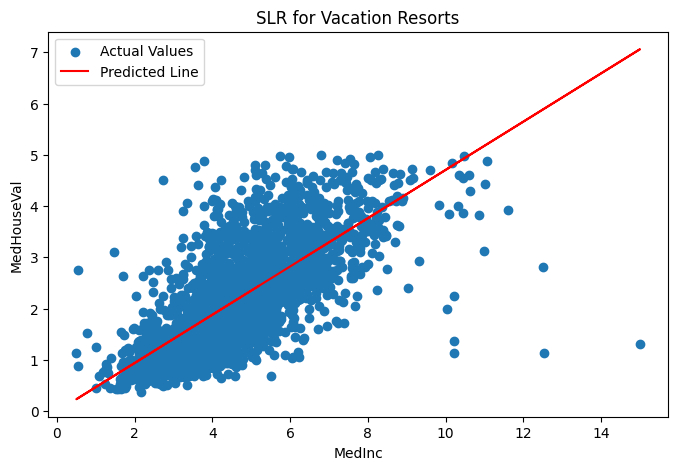

In [68]:
# Scatter plot for Vacation Resorts
plt.figure(figsize=(8, 5))
plt.scatter(X_vac_test, y_vac_test, label='Actual Values')
plt.plot(X_vac_test, y_vac_pred, color='red', label='Predicted Line')
plt.title("SLR for Vacation Resorts")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.legend()
plt.show()

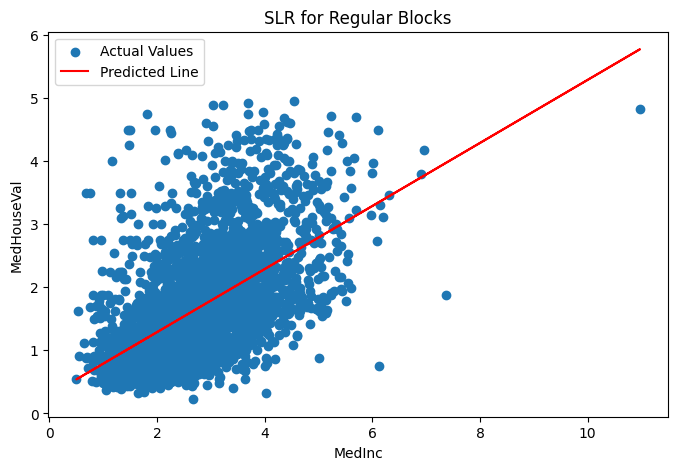

In [69]:
plt.figure(figsize=(8, 5))
plt.scatter(X_reg_test, y_reg_test, label='Actual Values')
plt.plot(X_reg_test, y_reg_pred, color='red', label='Predicted Line')
plt.title("SLR for Regular Blocks")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.legend()
plt.show()

1. SLR Without Modifications 
- The moderate R^2 score (0.4243) indicates the model explains only 42.43% of the variance in the data.
- High RMSE (0.9130) shows significant prediction errors, likely due to the presence of capped values and outliers in the data.
2. Eliminating Capped Data
- By removing capped data (e.g., block groups with capped or extreme values), the RMSE decreases (better predictions).
3.  SLR for Vacation Block Groups
- For block groups with few households and many empty houses (vacation resorts), the model performs better than the previous configurations.
- A lower RMSE (0.710) indicates improved prediction accuracy, and a higher  R^2  score (0.478) reflects better variance explanation compared to the unmodified dataset.
4. SLR for Regular Block Groups
- A lower RMSE (0.710) indicates improved prediction accuracy, and a higher  R^2  score (0.478) reflects better variance explanation compared to the unmodified dataset.
- The lower  R^2  also indicates that other features might need to be included to improve the model’s performance.